# PBI Clase 4

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df["PIB_Mundial"] = df.iloc[:, 2:].sum(axis=1)


In [57]:
df = pd.read_csv("pib_banco_mundial_50.csv",sep=";")

In [67]:
print("Datos del data set")
display(df.head())
print("\nDescripcion del data set")
display(df.describe())
print("\nTipos de datos:")
print(df.dtypes)

Datos del data set


,Country Name,Country Code,2019,2020,2021,2022,2023
0,Argentina,ARG,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,BRA,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,USA,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,CHN,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,IND,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12



Descripcion del data set


,2019,2020,2021,2022,2023
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,2.297086e+12,2.530067e+12,2.420443e+12,2.506341e+12,2.724741e+12
std,8.074134e+12,8.891849e+12,8.499300e+12,8.794686e+12,9.552498e+12
min,8.600000e+09,1.150000e+10,2.860000e+10,4.290000e+10,2.170000e+10
25%,4.702000e+11,5.225500e+11,6.608000e+11,7.343000e+11,1.185300e+12
50%,1.230300e+12,1.399400e+12,1.356700e+12,1.330500e+12,1.479800e+12
75%,1.904900e+12,2.160050e+12,1.846400e+12,1.856800e+12,1.807000e+12
max,5.857570e+13,6.451670e+13,6.172130e+13,6.391170e+13,6.948090e+13



Tipos de datos:
Country Name     object
Country Code     object
2019            float64
2020            float64
2021            float64
2022            float64
2023            float64
dtype: object


# Limpieza de datos

In [87]:
years = ['2019', '2020', '2021', '2022', '2023']
df_numeric = df[years].copy()


for year in years:          # Convertir a numeric
    df_numeric[year] = pd.to_numeric(df_numeric[year], errors='coerce')


df_numeric.index = df['Country Name'] # Agregar nombres de países como índice para referencia

print("\nDataFrame numérico:")
print(df_numeric.head())


DataFrame numérico:
                       2019          2020          2021          2022  \
Country Name                                                            
Argentina      1.492100e+12  5.090000e+11  2.781000e+11  7.350000e+11   
Brazil         8.961000e+11  2.279500e+12  1.978400e+12  1.322700e+12   
United States  2.164700e+12  6.277000e+11  6.323000e+11  1.705900e+12   
China          8.600000e+09  1.491000e+11  1.204200e+12  2.200000e+12   
India          8.261000e+11  1.537000e+12  2.098200e+12  2.001300e+12   

                       2023  
Country Name                 
Argentina      1.361300e+12  
Brazil         1.234500e+12  
United States  1.531200e+12  
China          9.592000e+11  
India          1.486400e+12  


# Extraer el PBI mundial

In [103]:
world_row = df[df['Country Name'] == 'World']
if not world_row.empty:
    pib_mundial = world_row[years].iloc[0]
    print("\nPIB Mundial (datos oficiales):")
    print(pib_mundial)
    
    # Eliminar 'World' del dataframe de países para el análisis
    df_paises = df[df['Country Name'] != 'World'].copy()
    df_numeric_paises = df_paises[years].copy()
    
    # Convertir a numeric
    for year in years:
        df_numeric_paises[year] = pd.to_numeric(df_numeric_paises[year], errors='coerce')
    
    # Agregar nombres de países como índice
    df_numeric_paises.index = df_paises['Country Name']
    
else:
    print("No se encontró la fila World")
    print("Calculando PIB mundial ")
    pib_mundial = df_numeric.sum()
    df_numeric_paises = df_numeric.copy()


PIB Mundial (datos oficiales):
2019    5.857570e+13
2020    6.451670e+13
2021    6.172130e+13
2022    6.391170e+13
2023    6.948090e+13
Name: 50, dtype: float64


In [105]:
print(f"\nDataFrame de países (sin World): {df_numeric_paises.shape}")
print(df_numeric_paises.head())


DataFrame de países (sin World): (50, 5)
                       2019          2020          2021          2022  \
Country Name                                                            
Argentina      1.492100e+12  5.090000e+11  2.781000e+11  7.350000e+11   
Brazil         8.961000e+11  2.279500e+12  1.978400e+12  1.322700e+12   
United States  2.164700e+12  6.277000e+11  6.323000e+11  1.705900e+12   
China          8.600000e+09  1.491000e+11  1.204200e+12  2.200000e+12   
India          8.261000e+11  1.537000e+12  2.098200e+12  2.001300e+12   

                       2023  
Country Name                 
Argentina      1.361300e+12  
Brazil         1.234500e+12  
United States  1.531200e+12  
China          9.592000e+11  
India          1.486400e+12  


# ANÁLISIS DE CORRELACIONES

In [123]:
df_transposed = df_numeric_paises.T
df_transposed['PIB_Mundial'] = pib_mundial

# Calcular correlaciones con PIB Mundial
correlaciones = df_transposed.corr()['PIB_Mundial'].sort_values(ascending=False)
print("\nCorrelaciones con PIB Mundial:")
print(correlaciones.drop('PIB_Mundial'))  # Excluir la correlación consigo mismo

# IDENTIFICAR PAÍSES MÁS CORRELACIONADOS
print("\nPaíses más correlacionados positivamente:")
top_positive = correlaciones_sin_mundial[correlaciones_sin_mundial > 0].head(10)
print(top_positive)

print("\nPaíses con menor correlación o correlación negativa:")
bottom_correlations = correlaciones_sin_mundial.tail(5)
print(bottom_correlations)



Correlaciones con PIB Mundial:
Country Name
Chile                   0.882378
South Korea             0.877127
Spain                   0.839181
Colombia                0.827016
Vietnam                 0.758632
Portugal                0.739286
Finland                 0.681315
Bolivia                 0.601279
Japan                   0.592790
Greece                  0.529007
Norway                  0.479544
Philippines             0.460323
Poland                  0.451430
Thailand                0.443854
France                  0.395599
Netherlands             0.359048
Nigeria                 0.355809
South Africa            0.330229
Italy                   0.314275
India                   0.290021
Kenya                   0.286506
China                   0.279320
Russia                  0.202069
Brazil                  0.134258
Venezuela               0.134059
United Kingdom          0.106473
Argentina               0.058927
Iran                   -0.045650
Bangladesh             -0.04668

# Visualizar correlaciones

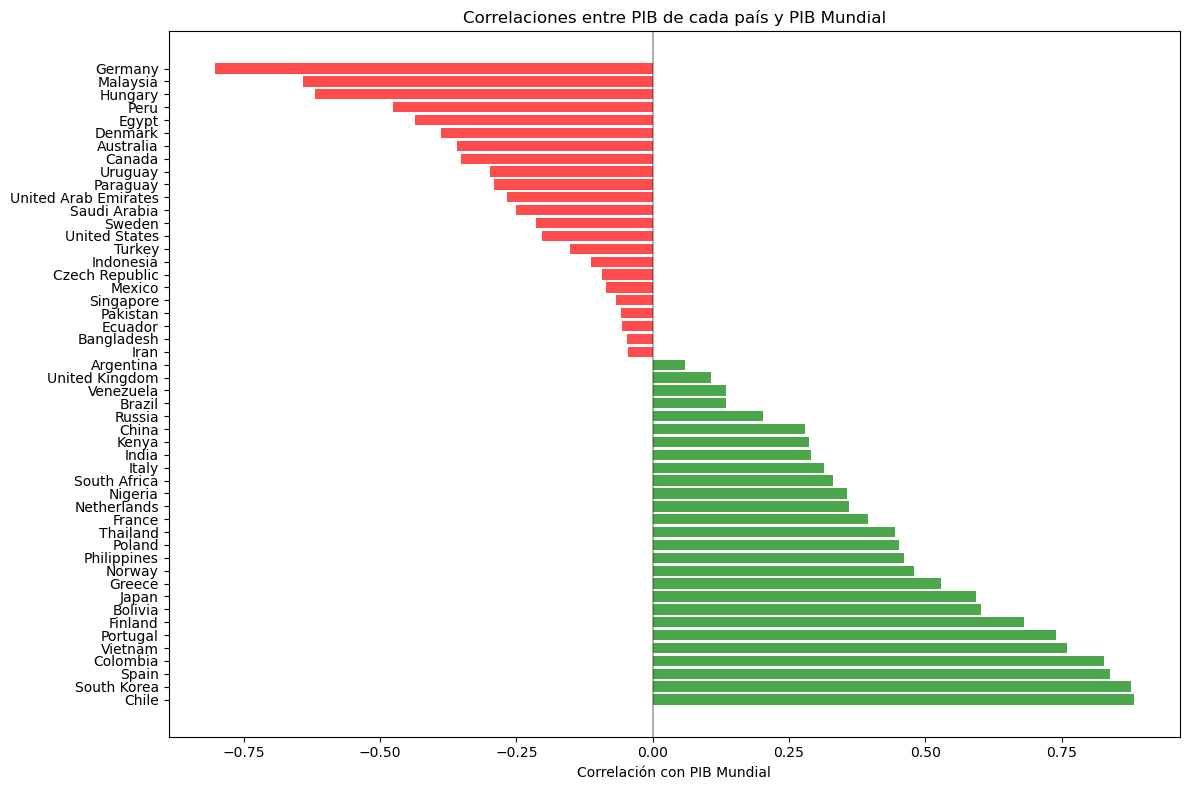

In [125]:
plt.figure(figsize=(12, 8))
correlaciones_sin_mundial = correlaciones.drop('PIB_Mundial')
colors = ['red' if x < 0 else 'green' for x in correlaciones_sin_mundial.values]
plt.barh(range(len(correlaciones_sin_mundial)), correlaciones_sin_mundial.values, color=colors, alpha=0.7)
plt.yticks(range(len(correlaciones_sin_mundial)), correlaciones_sin_mundial.index, rotation=0)
plt.xlabel('Correlación con PIB Mundial')
plt.title('Correlaciones entre PIB de cada país y PIB Mundial')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# MODELOS PREDICTIVOS

In [127]:
X = df_transposed.drop('PIB_Mundial', axis=1)
y = df_transposed['PIB_Mundial']

print(f"Datos disponibles: {len(y)} observaciones (años)")
print(f"Variables predictoras: {X.shape[1]} países")

Datos disponibles: 5 observaciones (años)
Variables predictoras: 50 países


# Evaluar combinaciones de países

In [129]:
def evaluar_combinacion(paises, X, y, nombre_modelo=""):
    """Evalua qué tan bien un conjunto de países predice el PIB mundial"""
    if len(paises) == 0:
        return None
    
    X_subset = X[list(paises)]
    
    
    if len(y) <= 5:
        
        model = LinearRegression()
        model.fit(X_subset, y)
        y_pred = model.predict(X_subset)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
    else:
        
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
    
    return {
        'paises': paises,
        'r2': r2,
        'mse': mse,
        'n_paises': len(paises),
        'modelo': model,
        'nombre': nombre_modelo
    }

# MODELOS 

In [145]:
resultados = []
# Modelo 1: Solo Argentina
result = evaluar_combinacion(['Argentina'], X, y, "Solo Argentina")
if result: resultados.append(result)

# Modelo 2: Argentina + Brasil
result = evaluar_combinacion(['Argentina', 'Brazil'], X, y, "Argentina + Brasil")
if result: resultados.append(result)

# Modelo 3: Argentina + Brasil + Australia
result = evaluar_combinacion(['Argentina', 'Brazil', 'Australia'], X, y, "Argentina + Brasil + Australia")
if result: resultados.append(result)

# Modelo 4: Top 3 países más correlacionados
top_3_paises = top_positive.head(3).index.tolist()
result = evaluar_combinacion(top_3_paises, X, y, f"Top 3 correlacionados: {', '.join(top_3_paises)}")
if result: resultados.append(result)

# Modelo 5: Top 5 países más correlacionados
top_5_paises = top_positive.head(5).index.tolist()
result = evaluar_combinacion(top_5_paises, X, y, f"Top 5 correlacionados")
if result: resultados.append(result)

# Modelo 6: Países con economías grandes (ejemplo)
grandes_economias = ['United States', 'China', 'Germany', 'Japan']
grandes_disponibles = [p for p in grandes_economias if p in X.columns]
if grandes_disponibles:
    result = evaluar_combinacion(grandes_disponibles, X, y, f"Grandes economías")
    if result: resultados.append(result)

# Modelo 7: Combinación de Latinoamérica
latam_paises = ['Argentina', 'Brazil', 'Mexico', 'Chile', 'Colombia', 'Peru']
latam_disponibles = [p for p in latam_paises if p in X.columns]
if latam_disponibles:
    result = evaluar_combinacion(latam_disponibles, X, y, "Países Latinoamericanos")
    if result: resultados.append(result)


# Resultados

In [147]:
for resultado in sorted(resultados, key=lambda x: x['r2'], reverse=True):
    print(f"{resultado['nombre']:<35} {resultado['r2']:.4f}   {resultado['mse']:.2e}   {resultado['n_paises']:<10}")

Top 5 correlacionados               1.0000   2.44e-05   5         
Grandes economías                   1.0000   1.22e-05   4         
Países Latinoamericanos             1.0000   0.00e+00   6         
Top 3 correlacionados: Chile, South Korea, Spain 0.8281   2.21e+24   3         
Argentina + Brasil + Australia      0.3510   8.34e+24   3         
Argentina + Brasil                  0.1424   1.10e+25   2         
Solo Argentina                      0.0035   1.28e+25   1         


In [155]:
mejor_modelo = max(resultados, key=lambda x: x['r2'])
print("MEJOR MODELO")
print(f"Modelo: {mejor_modelo['nombre']}")
print(f"Países incluidos: {', '.join(mejor_modelo['paises'])}")
print(f"R² Score: {mejor_modelo['r2']:.4f}")
print(f"MSE: {mejor_modelo['mse']:.2e}")

MEJOR MODELO
Modelo: Top 5 correlacionados
Países incluidos: Chile, South Korea, Spain, Colombia, Vietnam
R² Score: 1.0000
MSE: 2.44e-05
